In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut
from sklearn.feature_selection import f_classif,chi2,VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,KernelPCA
from sklearn.neural_network import MLPClassifier

#Import Data

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Ukuran Data
print(df.shape)

(1599, 12)


In [4]:
#Info Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


#Data Preprocessing

In [5]:
#Check data NaN
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Data tidak ada yang bernilai NaN

<function matplotlib.pyplot.show(*args, **kw)>

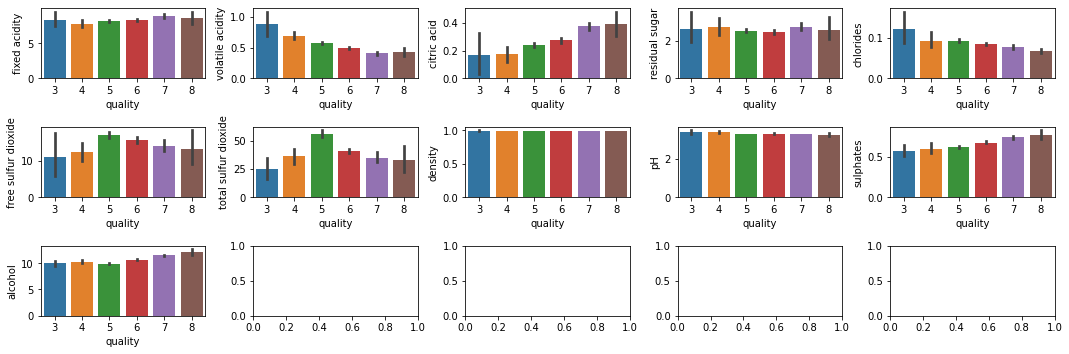

In [6]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 5))
ax=ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout()
plt.show

In [7]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Karena banyak label maka diubah berdasarkan batas . Tips didapatkan pada kaggle dataset

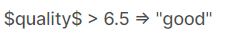

In [8]:
temp=[]
for i in range(len(df)):
  if(df["quality"][i]>6.5):
    temp.append(1) #1 berarti Bagus 
  else:
    temp.append(0) # 0 Berarti Tidak Bagus
df["quality"]=temp
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


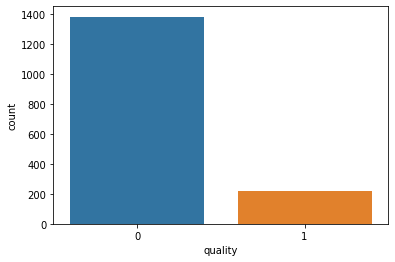

In [9]:
#Count Plot
sns.countplot(df["quality"])

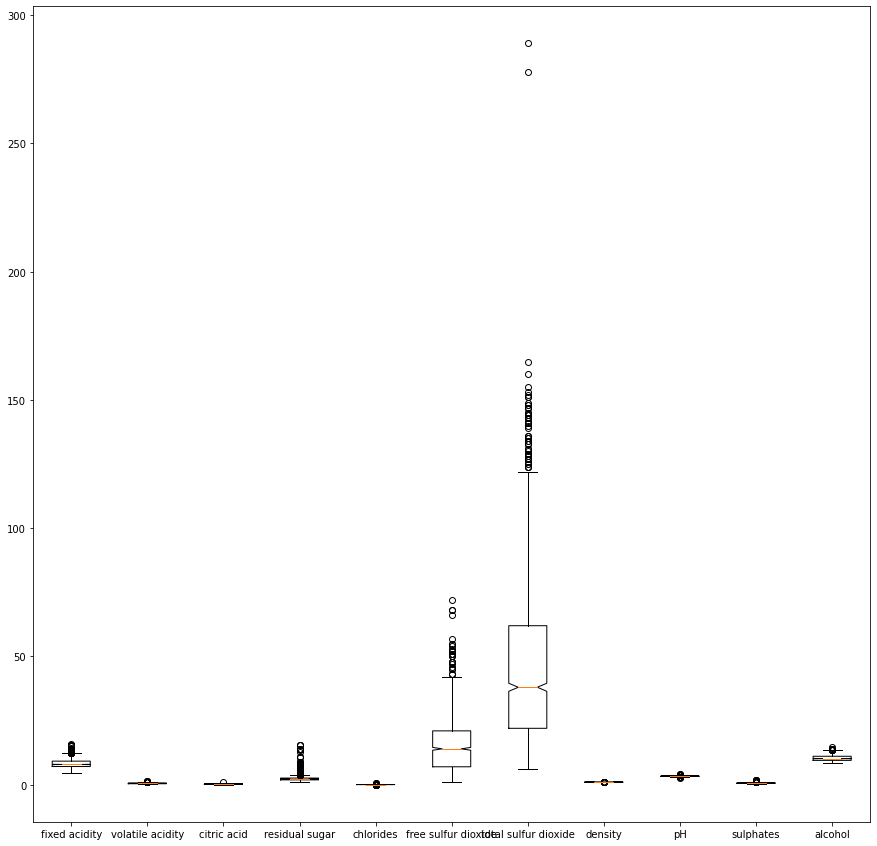

In [10]:
columns=[df['fixed acidity'],df['volatile acidity'],df['citric acid'], df['residual sugar'],
       df['chlorides'], df['free sulfur dioxide'], df['total sulfur dioxide'], df['density'],
       df['pH'], df['sulphates'], df['alcohol']]
nama_kolom=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
fig, ax =plt.subplots(1,1, figsize=(15, 15))
ax.boxplot(columns,notch=True)
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11], nama_kolom)
plt.show()

Tedapat outliers pada semua kolom tetapi hal ini dibiarkan karena asumsi saya bahwa salah satu feature diberikan nilai lebih atau kurang dari standar digunakan untuk menghasilkan kualitas bagus.

#Modelling

##Semua Feature


In [11]:
X=df.drop(["quality"],axis=1)
y=df["quality"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [12]:
scale=StandardScaler()
X_train_standard=scale.fit_transform(X_train)
X_test_standard=scale.fit_transform(X_test)

###KNN

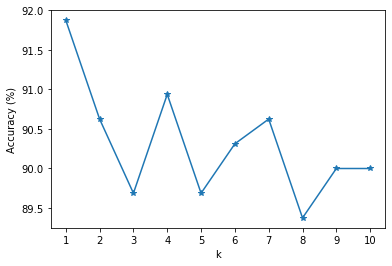

In [13]:
#Cari best n_neighbors
listOfAcc=[]
rangeK=range(1,11)
for k in rangeK:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_standard,y_train)
  ypred=knn.predict(X_test_standard)
  acc=100*accuracy_score(y_test,ypred)
  listOfAcc.append(acc)

bestK=listOfAcc.index(max(listOfAcc))
plt.plot(rangeK,listOfAcc,'-*')
plt.xticks(rangeK)
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.show()

Nilai k=1 , memiliki akurasi rata-rata tertinggi

In [14]:
modelKnn=KNeighborsClassifier(n_neighbors=bestK+1)
modelKnn.fit(X_train_standard,y_train)
ypred=modelKnn.predict(X_test_standard)
acc=100*accuracy_score(y_test,ypred)
print(acc)

91.875


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


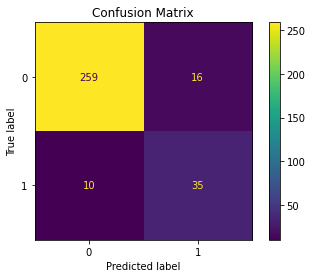


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       275
           1       0.69      0.78      0.73        45

    accuracy                           0.92       320
   macro avg       0.82      0.86      0.84       320
weighted avg       0.92      0.92      0.92       320



In [15]:
plot_confusion_matrix(modelKnn,X_test_standard,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))

### Naive Bayes


In [16]:
modelNaive=GaussianNB()
modelNaive.fit(X_train_standard,y_train)
ypred=modelNaive.predict(X_test_standard)
acc=100*accuracy_score(y_test,ypred)
print(acc)

84.0625


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


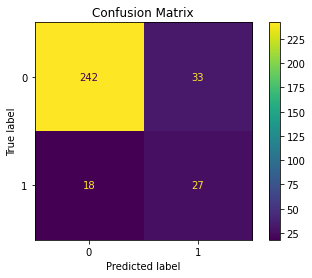


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       275
           1       0.45      0.60      0.51        45

    accuracy                           0.84       320
   macro avg       0.69      0.74      0.71       320
weighted avg       0.86      0.84      0.85       320



In [17]:
plot_confusion_matrix(modelNaive,X_test_standard,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))

### Logistic Regression

In [18]:
modelLogReg=LogisticRegression()
modelLogReg.fit(X_train_standard,y_train)
ypred=modelLogReg.predict(X_test_standard)
acc=100*accuracy_score(y_test,ypred)
print(acc)

88.75


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


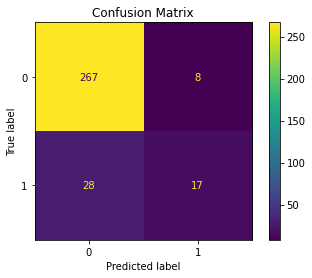


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       275
           1       0.68      0.38      0.49        45

    accuracy                           0.89       320
   macro avg       0.79      0.67      0.71       320
weighted avg       0.87      0.89      0.87       320



In [19]:
plot_confusion_matrix(modelLogReg,X_test_standard,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))

# Feature Selection

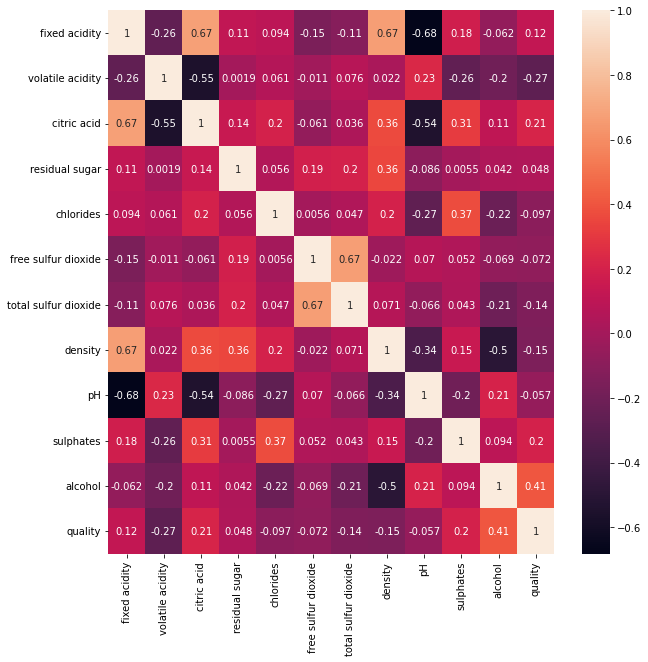

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Berdasarkan Correlation Matrix didapatkan bahwa semua berkorelasi linear dengan quality. Sedangkan untuk korelasi antar variabel juga tidak ada yang tinggi (nilai > 0.8) sehingga tidak ada yang perlu dihilangkan sehingga menggunakan semua feature.

#PCA

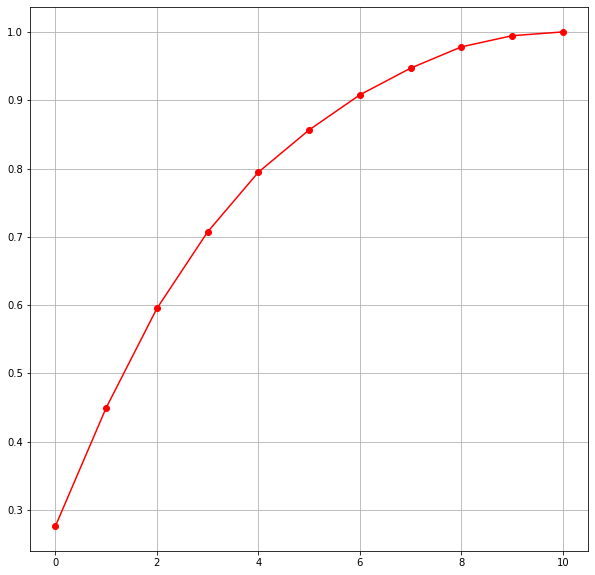

In [21]:
pca=PCA()
x_pca = pca.fit_transform(X_train_standard)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [22]:
pca_new=PCA(n_components=8)
X_train_pca=pca_new.fit_transform(X_train_standard)
X_test_pca=pca_new.transform(X_test_standard)

###KNN

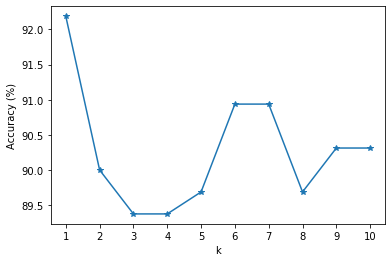

In [23]:
#Cari best n_neighbors
listOfAcc=[]
rangeK=range(1,11)
for k in rangeK:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_pca,y_train)
  ypred=knn.predict(X_test_pca)
  acc=100*accuracy_score(y_test,ypred)
  listOfAcc.append(acc)
bestK=listOfAcc.index(max(listOfAcc))
plt.plot(rangeK,listOfAcc,'-*')
plt.xticks(rangeK)
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.show()

Nilai k=1 , memiliki akurasi rata-rata tertinggi

In [24]:
modelKnn=KNeighborsClassifier(n_neighbors=bestK+1)
modelKnn.fit(X_train_pca,y_train)
ypred=modelKnn.predict(X_test_pca)
acc=100*accuracy_score(y_test,ypred)
print(acc)

92.1875


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


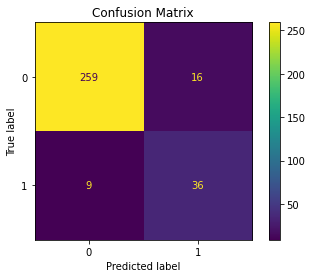


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       275
           1       0.69      0.80      0.74        45

    accuracy                           0.92       320
   macro avg       0.83      0.87      0.85       320
weighted avg       0.93      0.92      0.92       320



In [25]:
plot_confusion_matrix(modelKnn,X_test_pca,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))

### Naive Bayes


In [26]:
modelNaive=GaussianNB()
modelNaive.fit(X_train_pca,y_train)
ypred=modelNaive.predict(X_test_pca)
acc=100*accuracy_score(y_test,ypred)
print(acc)

89.375


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


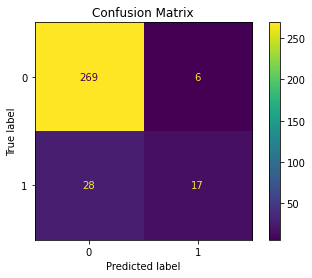


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       275
           1       0.74      0.38      0.50        45

    accuracy                           0.89       320
   macro avg       0.82      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320



In [27]:
plot_confusion_matrix(modelNaive,X_test_pca,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))

### Logistic Regression

In [28]:
modelLogReg=LogisticRegression()
modelLogReg.fit(X_train_pca,y_train)
ypred=modelLogReg.predict(X_test_pca)
acc=100*accuracy_score(y_test,ypred)
print(acc)

88.4375


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


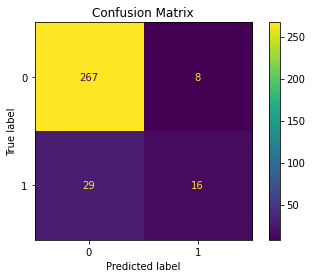


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       275
           1       0.67      0.36      0.46        45

    accuracy                           0.88       320
   macro avg       0.78      0.66      0.70       320
weighted avg       0.87      0.88      0.87       320



In [29]:
plot_confusion_matrix(modelLogReg,X_test_pca,y_test,display_labels=["0","1"])
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print()
print("CLASSIFICATION REPORT")
target=["0","1"]
print(classification_report(y_test,ypred,target_names=target))